In [13]:
import sqlite3
from sqlite3 import Error
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

con = sqlite3.connect("DB")

def sql_fetch(con):

    cursorObj = con.cursor()

    cursorObj.execute('SELECT name from sqlite_master where type= "table"')

    print(cursorObj.fetchall())

sql_fetch(con)
##


def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

def join1_sites__policy_snapshots(conn):
    sites = pd.read_sql_query("SELECT id, categories from sites WHERE categories LIKE '%tech%' or categories LIKE '%media%'", conn)#maybe requery and do .unique and rederfine categories
   #print('sites\n',sites)
    
    #sites[['id','categories']].groupby(['categories']).agg(['count']).sort(['count'])
    #df.set_index(['count'])
    #print(df.index)
    #print('categories\n',df['categories'].unique())#all categories that contaiin tech or media?
    print('sites table imported')
    print( sites.head())
    
    policy_snapshots = pd.read_sql_query("SELECT id, year, phase, policy_text_id,  classifier_probability from policy_snapshots", conn)
    #del result['policy_html_id']
    #del result['policy_reader_view_html_id']
    #del result['site_id']
    print('policy_snapshots table imported\n',policy_snapshots.head())
    
    result = pd.merge(sites, policy_snapshots, how="inner", on=["id", "id"])
    print('merge1 result all columns\n',result.columns)
    del result['id']
    #del result['id_x']
    print('merge1 result\n',result.columns)
    return(join2_result_policy_texts(conn,result))
def join2_result_policy_texts(conn,result):
    policy_texts = pd.read_sql_query("SELECT id,policy_text, flesch_ease, length from policy_texts", conn)
    print(policy_texts.columns)
    print('policy_texts table imported\n',policy_texts.head())
    
    result = pd.merge(policy_texts, result, on=None, left_on="id", right_on="policy_text_id",  how="inner")# on=["id","policy_text_id"])
    print('merge 2 all columns\n',result.columns)
    print('unique flesch_ease scores',result['flesch_ease'].unique())
    #print(result.columns)
    del result['policy_text_id']
    del result['id']
    print('merge 2\n',result.columns)
    print(result.head())
    #del result['']
    #del result['']
    return(result)
    
    

    
    


def DatabaseInterrogation():
    database = r"C:\Users\layto\sqlite\db"#.xz?

    # create a database connection
    conn = create_connection(database)
    with conn:
     #   print("1. Query task by priority:")
      #  select_task_by_priority(conn, 1)

        print("2. Query all tasks")
        result=join1_sites__policy_snapshots(conn)
        return(result)


if __name__ == '__main__':
    result=DatabaseInterrogation()   
    print('Database processing complete')
        
    



[]
2. Query all tasks
sites table imported
   id                categories
0   1  business;informationtech
1   2  business;informationtech
2   3  business;informationtech
3   4  business;informationtech
4   9  business;informationtech
policy_snapshots table imported
    id  year phase  policy_text_id  classifier_probability
0   1  2003     B               1                0.966039
1   2  2004     B               2                0.966039
2   3  2006     B               3                0.966039
3   4  2006     A               3                0.966039
4   5  2004     A               2                0.966039
merge1 result all columns
 Index(['id', 'categories', 'year', 'phase', 'policy_text_id',
       'classifier_probability'],
      dtype='object')
merge1 result
 Index(['categories', 'year', 'phase', 'policy_text_id',
       'classifier_probability'],
      dtype='object')
Index(['id', 'policy_text', 'flesch_ease', 'length'], dtype='object')
policy_texts table imported
    id        

fieldnames ['policy_text', 'flesch_ease', 'length', 'categories', 'year', 'phase', 'classifier_probability']
nlp 0        0
1        0
2        0
3        0
4        0
        ..
21910    0
21911    0
21912    0
21913    0
21914    0
Name: nlp, Length: 21915, dtype: int64


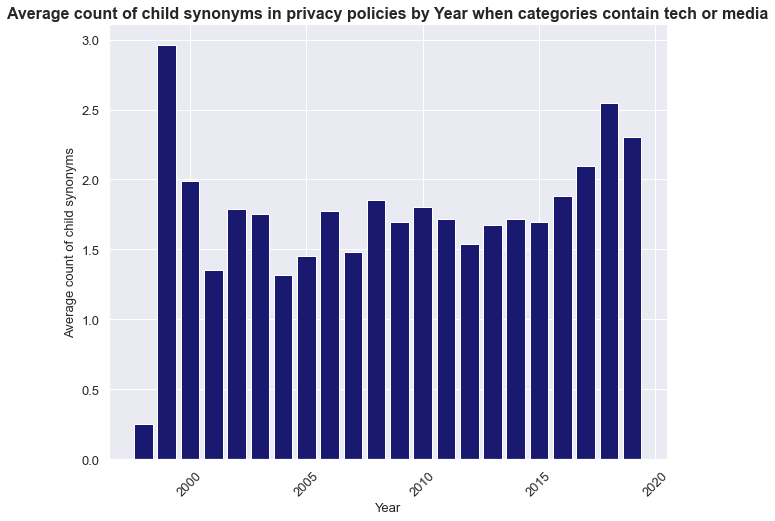

Average count of child synonyms in privacy policies by Year when categories contain tech or media Graph created
All Graphs constructed


In [14]:
def MainCode(result):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    
    #result['child']= re.findall('child[^, ]+',result['policy_text'])
    columns=result.columns
    fieldnames=[]
    for x in columns:
        #print(x)
        fieldnames.append(str(x))
    print('fieldnames',fieldnames)
    
    result['nlp']=result['policy_text'].str.count("child|Child|Minor|minor|underage|child|kid|young|youth")##here is where to adjust what words ar being checked, not earlier on so other graphs can be made
   
    #result['year'] = pd.to_datetime(result.year)
    #result.groupby(result.year)['nlp'].transform('mean')
    #nlp=nlp.agg('avg')
    #nlp.groupby(nlp['year'].dt.year)['policy_text'].agg(['mean'])
    print('nlp',result['nlp'])
    #fieldnames.remove('year')
    SQLcategoryFilter='when categories contain tech or media'
    makebarchart(result["year"],result.groupby(result.year)['nlp'].transform('mean'),'Year','Average count of child synonyms',SQLcategoryFilter)
    del result['nlp']
    
    
    
    print('All Graphs constructed')
    
    ##now make a loop to make all possible graphs against year
def makebarchart(x,y,xlabel,ylabel,SQLcategoryfilter):
    plt.rcParams["figure.figsize"] = (10,8)
    plt.bar(x = x,
    height = y,
    color = "midnightblue")
    plt.xticks(rotation = 45, fontsize = 13)
    plt.yticks(fontsize = 13)
    titlelabel=str(ylabel)+' in privacy policies by '+str(xlabel)+' '+str(SQLcategoryfilter)
    plt.title(titlelabel, fontsize = 16, fontweight = "bold")
    plt.xlabel(xlabel, fontsize = 13 )
    plt.ylabel(ylabel, fontsize = 13 )
    savelabel=str(titlelabel)+str('png')
    plt.savefig(savelabel)
    plt.show()
    print(titlelabel+' Graph created')

if __name__ == '__main__':
    MainCode(result)
#create_connection("C:\Users\layto\sqlite")